In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_excel(r"C:\Users\PC\Documents\Hamoye Classwork\CSV File\ENB2012_data_csv.xlsx")
 #rename columns
column_names = { 'X1' : 'Relative_Compactness' , 'X2' : 'Surface_Area' ,
'X3' : 'Wall_Area' , 'X4' : 'Roof_Area' , 'X5' : 'Overall_Height' ,
'X6' : 'Orientation' , 'X7' : 'Glazing_Area' ,
'X8' : 'Glazing_Area_Distribution' ,
'Y1' : 'Heating_Load' , 'Y2' : 'Cooling_Load' }
df = df.rename(columns=column_names)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [3]:
df.count()

Relative_Compactness         768
Surface_Area                 768
Wall_Area                    768
Roof_Area                    768
Overall_Height               768
Orientation                  768
Glazing_Area                 768
Glazing_Area_Distribution    768
Heating_Load                 768
Cooling_Load                 768
Unnamed: 10                    0
Unnamed: 11                    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                0 non-null      float64
dtypes: float64(10), int64(2)
memory usage: 72.1 KB


In [5]:
df.shape

(768, 12)

In [6]:
for feature in df.columns:
    if feature!="Heating_Load":
        print(feature,len(df[feature].unique()))

Relative_Compactness 12
Surface_Area 12
Wall_Area 7
Roof_Area 4
Overall_Height 2
Orientation 4
Glazing_Area 4
Glazing_Area_Distribution 6
Cooling_Load 636
Unnamed: 10 1
Unnamed: 11 1


In [7]:
df["Glazing_Area"].unique()

array([0.  , 0.1 , 0.25, 0.4 ])

In [8]:
df.isnull()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
0,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False,True,True
764,False,False,False,False,False,False,False,False,False,False,True,True
765,False,False,False,False,False,False,False,False,False,False,True,True
766,False,False,False,False,False,False,False,False,False,False,True,True


In [9]:
df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339,NaN,NaN
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999,NaN,NaN
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117,NaN,NaN
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547,NaN,NaN
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785,NaN,NaN
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290,NaN,NaN
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505,NaN,NaN
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525,NaN,NaN
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862,NaN,NaN
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000,NaN,NaN


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

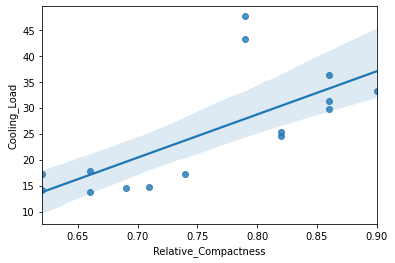

In [10]:
import seaborn as sns
df=df.rename(columns=column_names)
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness' , 'Cooling_Load']].sample(15, random_state= 2)

import seaborn as sns
#regression plot
sns.regplot(x="Relative_Compactness",y="Cooling_Load",data=simple_linear_reg_df)
#RSS -residual sum of squares--loss
#line of best fit is gotten by uusing ordinary least square method
#Algorithms - Gradient descedent

<AxesSubplot:>

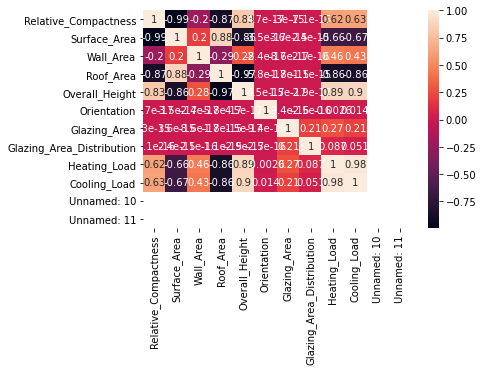

In [11]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

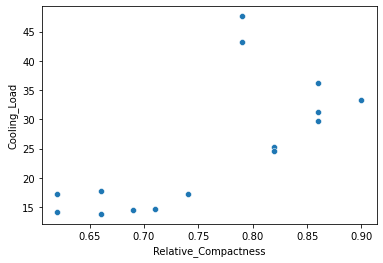

In [12]:
import seaborn as sns
#scatter plot
sns.scatterplot(x="Relative_Compactness",y="Cooling_Load",data=simple_linear_reg_df)
#RSS -residual sum of squares--loss
#line of best fit is gotten by uusing ordinary least square method
#Algorithms - Gradient descedent

In [13]:
df=df.drop("Cooling_Load",axis=1)
df.groupby("Overall_Height")["Heating_Load"].mean()

Overall_Height
3.5    13.338505
7.0    31.275885
Name: Heating_Load, dtype: float64

<AxesSubplot:xlabel='Orientation'>

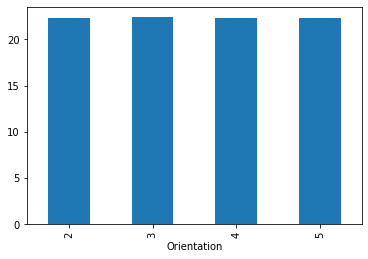

In [14]:
df.groupby("Orientation")["Heating_Load"].mean().plot.bar()

In [15]:
print(simple_linear_reg_df.shape)

(15, 2)


<AxesSubplot:xlabel='Roof_Area'>

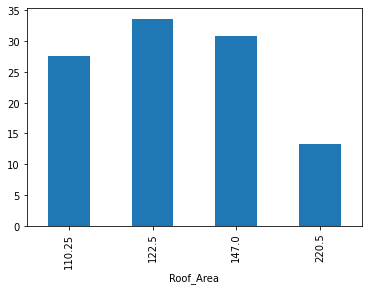

In [16]:
df.groupby("Roof_Area")["Heating_Load"].mean().plot.bar()

<AxesSubplot:xlabel='Surface_Area'>

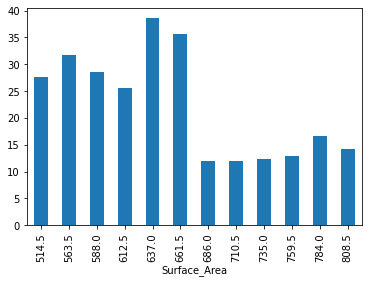

In [19]:
df.groupby("Surface_Area")["Heating_Load"].mean().plot.bar()

<AxesSubplot:xlabel='Roof_Area'>

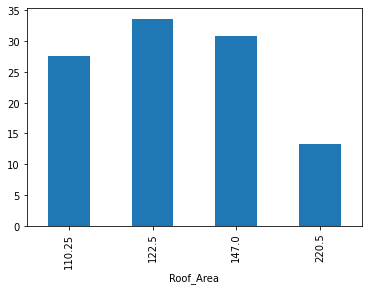

In [21]:
df.groupby("Roof_Area")["Heating_Load"].mean().plot.bar()

<AxesSubplot:xlabel='Glazing_Area_Distribution'>

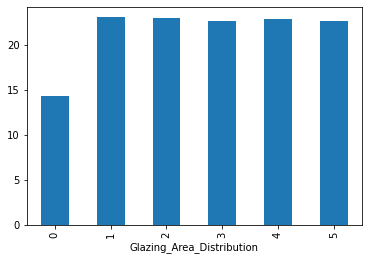

In [20]:
df.groupby("Glazing_Area_Distribution")["Heating_Load"].mean().plot.bar()

<AxesSubplot:xlabel='Wall_Area'>

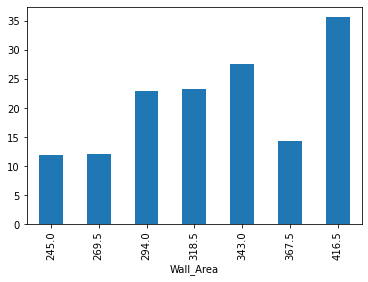

In [22]:
df.groupby("Wall_Area")["Heating_Load"].mean().plot.bar()

<AxesSubplot:xlabel='Overall_Height'>

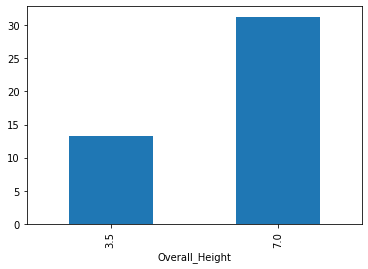

In [23]:
df.groupby("Overall_Height")["Heating_Load"].mean().plot.bar()

In [24]:
len(df["Heating_Load"].unique())

587

In [25]:
len(df["Overall_Height"].unique())

2

In [27]:
len(df["Wall_Area"].unique())

7

In [28]:
len(df["Glazing_Area_Distribution"].unique())

6

In [29]:
len(df["Surface_Area"].unique())

12

In [30]:
len(df["Orientation"].unique())

4

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Count'>

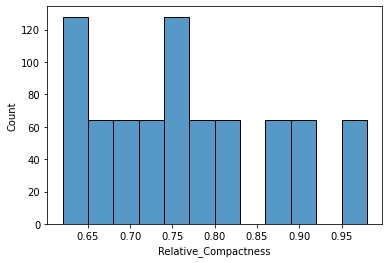

In [31]:
sns.histplot(df["Relative_Compactness"])

In [32]:
len(df["Relative_Compactness"].unique())

12

In [33]:
df["Roof_Area"].unique()

array([110.25, 122.5 , 147.  , 220.5 ])

In [34]:
df["Wall_Area"].unique()

array([294. , 318.5, 343. , 416.5, 245. , 269.5, 367.5])

In [36]:
df["Heating_Load"].unique()

array([15.55 , 20.84 , 21.46 , 20.71 , 19.68 , 19.5  , 19.95 , 19.34 ,
       18.31 , 17.05 , 17.41 , 16.95 , 15.98 , 28.52 , 29.9  , 29.63 ,
       28.75 , 24.77 , 23.93 ,  6.07 ,  6.05 ,  6.01 ,  6.04 ,  6.37 ,
        6.4  ,  6.366,  6.85 ,  6.79 ,  6.77 ,  6.81 ,  7.18 ,  7.1  ,
       10.85 , 10.54 , 10.77 , 10.56 ,  8.6  ,  8.49 ,  8.45 ,  8.5  ,
       24.58 , 24.63 , 24.59 , 29.03 , 29.87 , 29.14 , 28.09 , 26.28 ,
       26.91 , 26.37 , 25.27 , 23.53 , 24.03 , 23.54 , 22.58 , 35.56 ,
       37.12 , 36.9  , 35.94 , 32.96 , 32.12 , 32.94 , 32.21 , 10.36 ,
       10.43 , 10.39 , 10.71 , 10.8  , 10.7  , 10.75 , 11.11 , 11.13 ,
       11.09 , 11.16 , 11.68 , 11.69 , 11.7  , 15.41 , 15.2  , 15.42 ,
       15.21 , 12.96 , 12.97 , 12.93 , 13.02 , 24.29 , 24.31 , 24.13 ,
       24.25 , 28.88 , 29.68 , 28.83 , 27.9  , 26.48 , 27.02 , 26.33 ,
       25.36 , 23.75 , 24.23 , 23.67 , 22.79 , 35.65 , 37.26 , 36.97 ,
       36.03 , 33.16 , 32.4  , 33.12 , 32.41 , 10.42 , 10.46 , 10.32 ,
      

In [38]:
df["Orientation"].unique()

array([2, 3, 4, 5], dtype=int64)

In [39]:
df["Surface_Area"].unique()

array([514.5, 563.5, 588. , 612.5, 637. , 661.5, 686. , 710.5, 735. ,
       759.5, 784. , 808.5])

In [42]:
df["Overall_Height"].unique()

array([7. , 3.5])

In [43]:
df["Glazing_Area_Distribution"].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [52]:
df.tail()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Unnamed: 10,Unnamed: 11
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,NaN,NaN
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,NaN,NaN
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,NaN,NaN
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,NaN,NaN
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,NaN,NaN


In [93]:
df.max()

Relative_Compactness           0.98
Surface_Area                 808.50
Wall_Area                    416.50
Roof_Area                    220.50
Overall_Height                 7.00
Orientation                    5.00
Glazing_Area                   0.40
Glazing_Area_Distribution      5.00
Unnamed: 10                     NaN
Unnamed: 11                     NaN
dtype: float64

In [105]:
df.tail()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Unnamed: 10,Unnamed: 11
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,NaN,NaN
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,NaN,NaN
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,NaN,NaN
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,NaN,NaN
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,NaN,NaN


In [87]:
df.mode()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Unnamed: 10,Unnamed: 11
0,0.62,514.5,294.0,220.5,3.5,2.0,0.10,1.0,NaN,NaN
1,0.64,563.5,318.5,NaN,7.0,3.0,0.25,2.0,NaN,NaN
2,0.66,588.0,NaN,NaN,NaN,4.0,0.40,3.0,NaN,NaN
3,0.69,612.5,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN
4,0.71,637.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
5,0.74,661.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.76,686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.79,710.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.82,735.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.86,759.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df.median()

Relative_Compactness           0.75
Surface_Area                 673.75
Wall_Area                    318.50
Roof_Area                    183.75
Overall_Height                 5.25
Orientation                    3.50
Glazing_Area                   0.25
Glazing_Area_Distribution      3.00
Unnamed: 10                     NaN
Unnamed: 11                     NaN
dtype: float64

In [89]:
df.sum()

Relative_Compactness            586.88
Surface_Area                 515872.00
Wall_Area                    244608.00
Roof_Area                    135632.00
Overall_Height                 4032.00
Orientation                    2688.00
Glazing_Area                    180.00
Glazing_Area_Distribution      2160.00
Unnamed: 10                       0.00
Unnamed: 11                       0.00
dtype: float64

In [90]:
df.var()

Relative_Compactness            0.011189
Surface_Area                 7759.163842
Wall_Area                    1903.269883
Roof_Area                    2039.963060
Overall_Height                  3.066493
Orientation                     1.251630
Glazing_Area                    0.017748
Glazing_Area_Distribution       2.405476
Unnamed: 10                          NaN
Unnamed: 11                          NaN
dtype: float64

In [91]:
df.mean()

Relative_Compactness           0.764167
Surface_Area                 671.708333
Wall_Area                    318.500000
Roof_Area                    176.604167
Overall_Height                 5.250000
Orientation                    3.500000
Glazing_Area                   0.234375
Glazing_Area_Distribution      2.812500
Unnamed: 10                         NaN
Unnamed: 11                         NaN
dtype: float64

In [92]:
df.min()

Relative_Compactness           0.62
Surface_Area                 514.50
Wall_Area                    245.00
Roof_Area                    110.25
Overall_Height                 3.50
Orientation                    2.00
Glazing_Area                   0.00
Glazing_Area_Distribution      0.00
Unnamed: 10                     NaN
Unnamed: 11                     NaN
dtype: float64

In [106]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\pc\anaconda3\lib\site-packages (0.24.1)



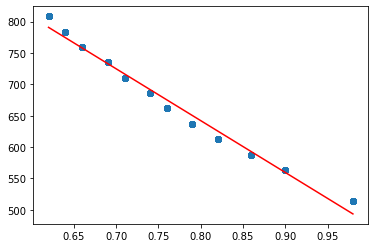

In [108]:
# To read data
from sklearn.linear_model import LinearRegression
data = pd.read_excel(r"C:\Users\PC\Documents\Hamoye Classwork\CSV File\ENB2012_data_csv.xlsx") 
# load data set
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Relative_Compactness 12
Surface_Area 12
Wall_Area 7
Roof_Area 4
Orientation 4
Glazing_Area 4
Glazing_Area_Distribution 6
Unnamed: 10 1
Unnamed: 11 1


Text(0, 0.5, 'Frequency')

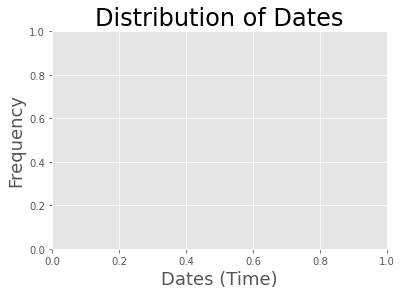

In [114]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_excel(r"C:\Users\PC\Documents\Hamoye Classwork\CSV File\ENB2012_data_csv.xlsx") 
# load data set
# histogram of the Overall height
for feature in df.columns:
    if feature!="Overall_Height":
        print(feature,len(df[feature].unique()))
plt.title('Distribution of Dates', size=24)
plt.xlabel('Dates (Time)', size=18)
plt.ylabel('Frequency', size=18)

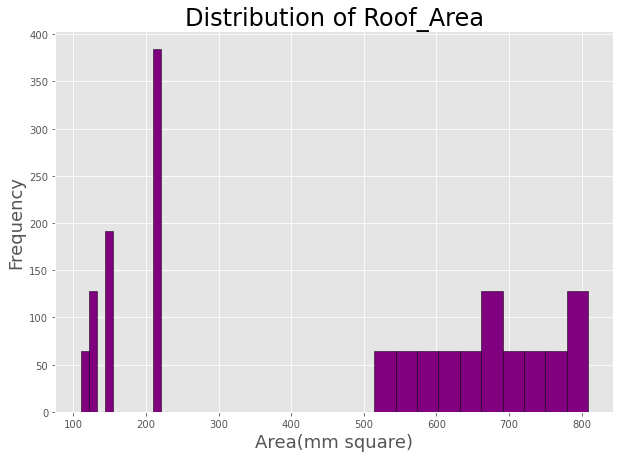

In [117]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# histogram of the Roof_Area
df.Roof_Area.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Roof_Area', size=24)
plt.xlabel('Area(mm square)', size=18)
plt.ylabel('Frequency', size=18);

Text(0, 0.5, 'Frequency')

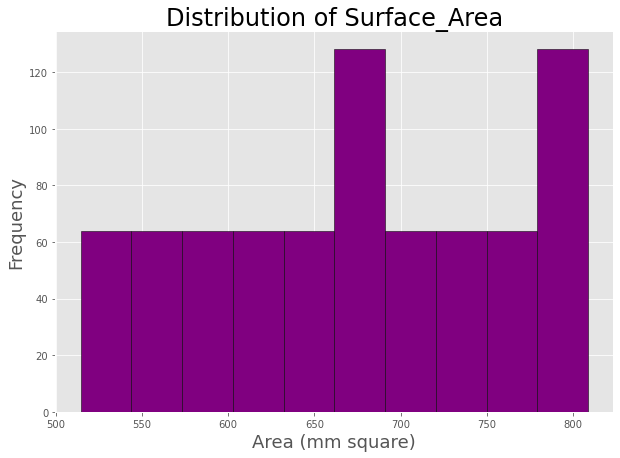

In [118]:
# histogram of the Surface_Area
df.Surface_Area.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Surface_Area', size=24)
plt.xlabel('Area (mm square)', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

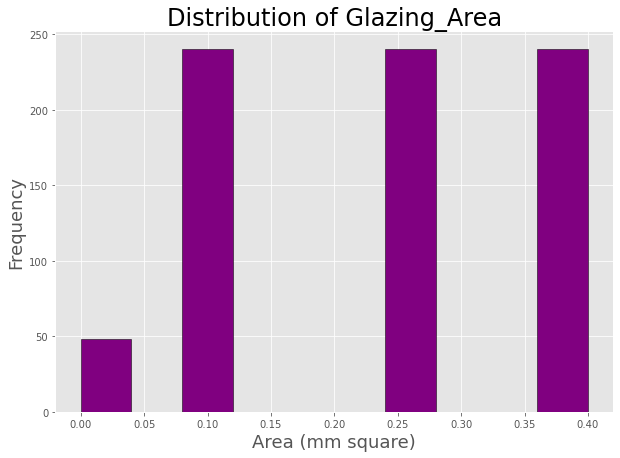

In [119]:
# histogram of the Glazing_Area
df.Glazing_Area.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Glazing_Area', size=24)
plt.xlabel('Area (mm square)', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

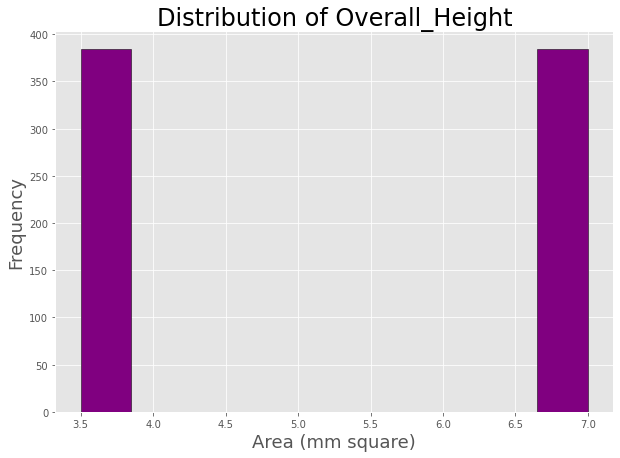

In [120]:
# histogram of the Overall_Height
df.Overall_Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Overall_Height', size=24)
plt.xlabel('Area (mm square)', size=18)
plt.ylabel('Frequency', size=18)


Text(0, 0.5, 'Frequency')

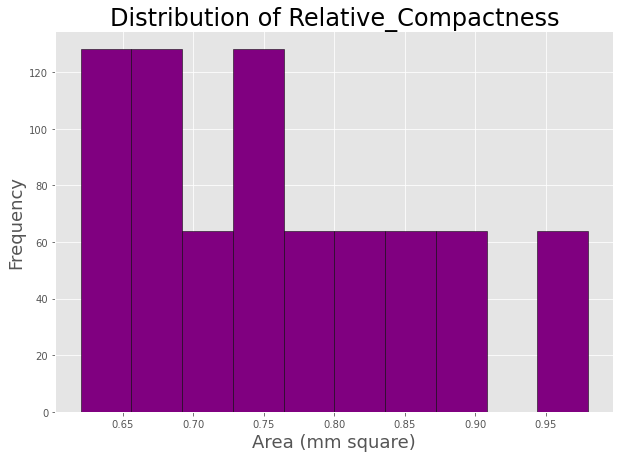

In [126]:
# histogram of the Relative_Compactness
df.Relative_Compactness.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Relative_Compactness', size=24)
plt.xlabel('Area (mm square)', size=18)
plt.ylabel('Frequency', size=18)


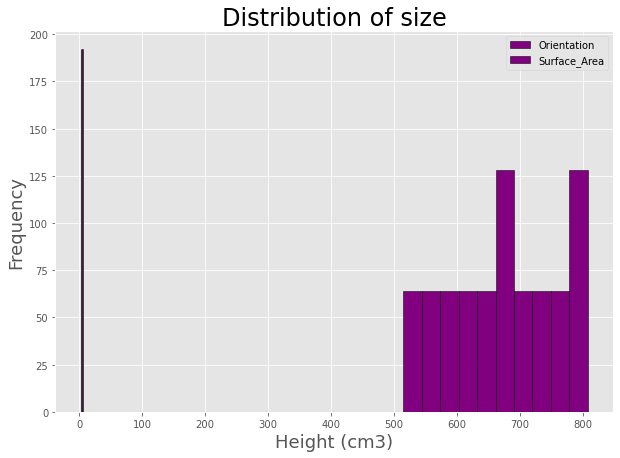

In [129]:
# histogram of the size - Orientation and Surface_Area
df.Orientation.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
df.Surface_Area.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.legend(labels=['Orientation', 'Surface_Area'])
plt.title('Distribution of size', size=24)
plt.xlabel('Height (cm3)', size=18)
plt.ylabel('Frequency', size=18);

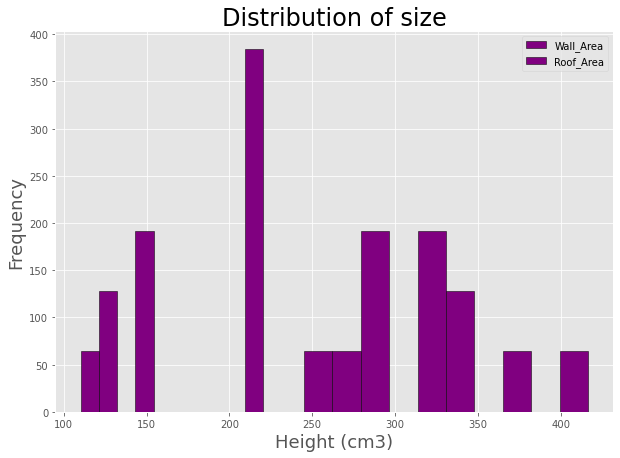

In [128]:
# histogram of the size - Wall_Area and Roof_Area
df.Wall_Area.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
df.Roof_Area.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.legend(labels=['Wall_Area', 'Roof_Area'])
plt.title('Distribution of size', size=24)
plt.xlabel('Height (cm3)', size=18)
plt.ylabel('Frequency', size=18);
